# Chapter 02: Getting Started with PyTorch

## Get access to Google Drive

In [8]:
import os

use_colab = False

try:
    from google.colab import drive
    drive.mount('/content/drive')        
    os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep-Learning-for-Time-Series-Data-Cookbook/Chapter_2')
except ImportError:
    print("Google Colab environment not detected. Running in local environment.")


# if use_colab:
#     # If running in Google Colab, mount Google Drive
#     try:
#         from google.colab import drive
#         drive.mount('/content/drive')        
#         os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep-Learning-for-Time-Series-Data-Cookbook/Chapter_2')
#     except ImportError:
#         print("Google Colab environment not detected. Running in local environment.")

Google Colab environment not detected. Running in local environment.


## Basic operations in PyTorch

In [9]:
import torch

In [10]:
t1 = torch.tensor([1, 2, 3])
print(t1)

tensor([1, 2, 3])


In [16]:
t2 = torch.tensor([[1, 2], [3, 4]])
print(t2)

tensor([[1, 2],
        [3, 4]])


In [11]:
import numpy as np
np_array = np.array([5, 6, 7])
t3 = torch.from_numpy(np_array)
print(t3)

tensor([5, 6, 7])


In [12]:
t4 = torch.zeros((3, 3))
print(t4)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [60]:
t5 = torch.ones((3, 3), dtype=torch.int64)
print(t5)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [61]:
t6 = torch.eye(3)
print(t6)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [62]:
result = t1 + t3
print(result)
result = t3 - t1
print(result)
result = t1 * t3
print(result)
result = t3 / t1
print(result)

tensor([ 6,  8, 10])
tensor([4, 4, 4])
tensor([ 5, 12, 21])
tensor([5.0000, 3.0000, 2.3333])


In [63]:
t7 = torch.arange(9) # Creates a 1D tensor [0, 1, 2, ..., 8]
t8 = t7.reshape((3, 3)) # Reshapes the tensor to a 3x3 matrix
print(t8)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


## Advanced operations in PyTorch

In [64]:
print(t1)
print(t3)
dot_product = torch.dot(t1, t3)
print(dot_product)

tensor([1, 2, 3])
tensor([5, 6, 7])
tensor(38)


In [65]:
t_transposed = t2.T
print(t2)
print(t_transposed)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 3],
        [2, 4]])


In [71]:
print(t8)
print(t3)
matrix_product = torch.mm(t8, t3.reshape(3, 1))
print(matrix_product)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([5, 6, 7])
tensor([[ 20],
        [ 74],
        [128]])


In [76]:
print(t2)
det = torch.det(t2.float())
print(det)
inverse = torch.inverse(t2.float())
print(inverse.int())

tensor([[1, 2],
        [3, 4]])
tensor(-2.)
tensor([[-2,  1],
        [ 1,  0]], dtype=torch.int32)


## Building a simple neural network with PyTorch

In [77]:
import torch

X = torch.randn(100, 10)  # 100 samples, 10 time steps
y = torch.randn(100, 1)

input_size = 10
hidden_size = 5
output_size = 1

W1 = torch.randn(hidden_size, input_size).requires_grad_()
b1 = torch.zeros(hidden_size, requires_grad=True)
W2 = torch.randn(output_size, hidden_size).requires_grad_()
b2 = torch.zeros(output_size, requires_grad=True)
W1, b1, W2, b2

(tensor([[ 1.1682,  0.1341, -1.0243,  0.6603, -1.5947,  2.1601, -0.4789, -0.5081,
           0.6440, -0.1328],
         [ 1.8440,  0.8277,  1.5968, -0.9206, -0.4501, -0.0243,  0.3353,  0.3317,
           0.2594,  0.3663],
         [-0.3241,  0.6907,  0.1984, -0.1498,  0.6317, -2.0370,  0.0132, -0.7915,
           0.7904, -1.4297],
         [-1.1334, -0.4756, -0.0565,  0.0566,  0.2903, -0.6863,  0.8955, -0.1206,
          -0.7149, -0.2287],
         [-1.0735, -0.5989, -0.7003, -0.2159,  1.2172, -0.7518, -0.9734,  0.3644,
          -0.3032, -1.3468]], requires_grad=True),
 tensor([0., 0., 0., 0., 0.], requires_grad=True),
 tensor([[ 0.3391,  0.5167, -1.5682,  0.1060,  1.1213]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [79]:


def simple_neural_net(x, W1, b1, W2, b2):
    z1 = torch.mm(x, W1.t()) + b1
    a1 = torch.sigmoid(z1)
    z2 = torch.mm(a1, W2.t()) + b2
    return z2


In [81]:
lr = 0.01
epochs = 1000

loss_fn = torch.nn.MSELoss()

for epoch in range(epochs):
    y_pred = simple_neural_net(X, W1, b1, W2, b2)
    loss = loss_fn(y_pred.squeeze(), y)

    loss.backward()

    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} \t Loss: {loss.item()}')

Epoch: 0 	 Loss: 0.8656741976737976
Epoch: 10 	 Loss: 0.8619359135627747
Epoch: 20 	 Loss: 0.8583920001983643
Epoch: 30 	 Loss: 0.8550294637680054
Epoch: 40 	 Loss: 0.8518365025520325
Epoch: 50 	 Loss: 0.8488021492958069
Epoch: 60 	 Loss: 0.8459166288375854
Epoch: 70 	 Loss: 0.8431702256202698
Epoch: 80 	 Loss: 0.8405547738075256
Epoch: 90 	 Loss: 0.8380621075630188
Epoch: 100 	 Loss: 0.835685133934021
Epoch: 110 	 Loss: 0.8334167003631592
Epoch: 120 	 Loss: 0.8312506079673767
Epoch: 130 	 Loss: 0.8291811347007751
Epoch: 140 	 Loss: 0.827202558517456
Epoch: 150 	 Loss: 0.8253099322319031
Epoch: 160 	 Loss: 0.8234984278678894
Epoch: 170 	 Loss: 0.8217635750770569
Epoch: 180 	 Loss: 0.8201012015342712
Epoch: 190 	 Loss: 0.8185076117515564
Epoch: 200 	 Loss: 0.8169789910316467
Epoch: 210 	 Loss: 0.8155120015144348
Epoch: 220 	 Loss: 0.814103364944458
Epoch: 230 	 Loss: 0.8127502202987671
Epoch: 240 	 Loss: 0.8114497065544128
Epoch: 250 	 Loss: 0.8101990818977356
Epoch: 260 	 Loss: 0.80899

## Training a feedforward neural network

In [82]:
import torch
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 10 input units, 5 units in the hidden layer
        self.fc1 = nn.Linear(10, 5)
        # 5 units in the hidden layer, 1 output unit
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
print(net)


Net(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [83]:

# Create a synthetic dataset
X = torch.randn(100, 10)
Y = torch.randn(100, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for epoch in range(100):
    # Forward pass: compute predicted outputs by passing
    # inputs to the model
    output = net(X)
    # Compute loss
    loss = loss_fn(output, Y)
    # Zero the gradients before running the backward pass
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss
    # with respect to model parameters
    loss.backward()
    # Calling the step function on an Optimizer performs
    # an update on its parameters
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.226313591003418
Epoch 2, Loss: 1.225061058998108
Epoch 3, Loss: 1.2238587141036987
Epoch 4, Loss: 1.222710371017456
Epoch 5, Loss: 1.2215958833694458
Epoch 6, Loss: 1.220513105392456
Epoch 7, Loss: 1.2194608449935913
Epoch 8, Loss: 1.2184460163116455
Epoch 9, Loss: 1.2174689769744873
Epoch 10, Loss: 1.2165169715881348
Epoch 11, Loss: 1.2155828475952148
Epoch 12, Loss: 1.2146645784378052
Epoch 13, Loss: 1.2137675285339355
Epoch 14, Loss: 1.2128901481628418
Epoch 15, Loss: 1.212031602859497
Epoch 16, Loss: 1.2111910581588745
Epoch 17, Loss: 1.2103673219680786
Epoch 18, Loss: 1.209559679031372
Epoch 19, Loss: 1.208767294883728
Epoch 20, Loss: 1.2079905271530151
Epoch 21, Loss: 1.2072335481643677
Epoch 22, Loss: 1.2065165042877197
Epoch 23, Loss: 1.2058480978012085
Epoch 24, Loss: 1.2051907777786255
Epoch 25, Loss: 1.204564094543457
Epoch 26, Loss: 1.2039451599121094
Epoch 27, Loss: 1.2033350467681885
Epoch 28, Loss: 1.2027395963668823
Epoch 29, Loss: 1.202195644378662
Epo

## Training a recurrent neural network

In [84]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)  # get RNN output
        # pass last output to Fully Connected layer
        out = self.fc(out[:, -1, :])
        return out


rnn = RNN(10, 20, 1)  # 10 features, 20 hidden units, 1 output
print(rnn)


RNN(
  (rnn): RNN(10, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)


Modify the synthetic dataset for RNN

In [ ]:


X = torch.randn(100, 5, 10)  # 100 samples, 5 time steps, 10 features
Y = torch.randn(100, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(rnn.parameters(), lr=0.01)

for epoch in range(100):
    output = rnn(X)
    loss = loss_fn(output, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 1.4021955728530884
Epoch 2, Loss: 1.3857455253601074
Epoch 3, Loss: 1.3703455924987793
Epoch 4, Loss: 1.355907917022705
Epoch 5, Loss: 1.3423523902893066
Epoch 6, Loss: 1.3296074867248535
Epoch 7, Loss: 1.3176078796386719
Epoch 8, Loss: 1.3062944412231445
Epoch 9, Loss: 1.295613408088684
Epoch 10, Loss: 1.2855157852172852
Epoch 11, Loss: 1.2759569883346558
Epoch 12, Loss: 1.2668962478637695
Epoch 13, Loss: 1.258296251296997
Epoch 14, Loss: 1.2501230239868164
Epoch 15, Loss: 1.2423454523086548
Epoch 16, Loss: 1.2349345684051514
Epoch 17, Loss: 1.227864146232605
Epoch 18, Loss: 1.2211103439331055
Epoch 19, Loss: 1.2146506309509277
Epoch 20, Loss: 1.208464503288269
Epoch 21, Loss: 1.2025333642959595
Epoch 22, Loss: 1.1968398094177246
Epoch 23, Loss: 1.1913676261901855
Epoch 24, Loss: 1.1861023902893066
Epoch 25, Loss: 1.1810301542282104
Epoch 26, Loss: 1.1761384010314941
Epoch 27, Loss: 1.1714156866073608
Epoch 28, Loss: 1.1668509244918823
Epoch 29, Loss: 1.1624345779418945

## Training an LSTM neural network

In [2]:
import torch
import torch.nn as nn


class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        # initial cell state
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # get LSTM output
        # pass last output to Fully Connected layer
        out = self.fc(out[:, -1, :])

        return out



In [3]:

lstm = LSTM(10, 20, 1) # 10 features, 20 hidden units, 1 output
print(lstm)

LSTM(
  (lstm): LSTM(10, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)


This is not just a "synthetic dataset": X and Y are not related and Y is white noise. There is absolutely nothing to model here.

In [12]:
# 100 samples, 5 time steps, 10 features
X = torch.randn(100, 5, 10)
Y = torch.randn(100, 1)
Y[:10,:]

tensor([[-0.9620],
        [-0.1106],
        [-1.3949],
        [ 0.0440],
        [-1.2046],
        [-0.3086],
        [-0.3962],
        [-0.9095],
        [ 1.2386],
        [-1.7599]])

In [13]:

X[:3,:,:]

tensor([[[ 0.4384,  0.6847, -1.0775,  1.1146,  0.6611,  0.1942,  0.3431,
           0.0035, -0.4176,  0.3134],
         [ 0.1678,  0.7641,  0.4815,  0.7428, -1.2157,  0.4349,  1.4410,
           1.0589,  0.7678,  2.4710],
         [ 0.1020,  0.7303,  1.8581, -0.5531, -0.6329,  1.2871,  0.8909,
           0.6893, -0.1262, -0.0562],
         [-0.1668,  0.0589,  0.5628, -0.7905,  0.1932,  0.8408, -2.1116,
           0.1591,  0.0281, -0.8056],
         [ 0.8292, -1.2912, -0.5528, -0.7292, -0.3453,  0.8266, -0.1406,
          -1.4395, -0.8212,  0.5881]],

        [[-0.2545, -0.3642,  0.9165,  0.0131,  1.0613,  0.7096, -0.7185,
           0.5989,  0.9417, -1.1460],
         [ 0.5392,  0.6475, -0.4949, -1.3541,  1.9032, -0.9496,  0.9667,
          -0.9873, -0.6311,  0.8623],
         [ 0.3226,  0.9128,  0.2786,  1.5006, -0.0407, -0.1671,  1.6409,
          -0.0159,  0.7414, -0.1308],
         [ 0.1290, -0.3488,  1.1270,  1.5904, -1.1980,  0.3793,  0.0502,
          -0.1465, -0.2154,  0.1103],

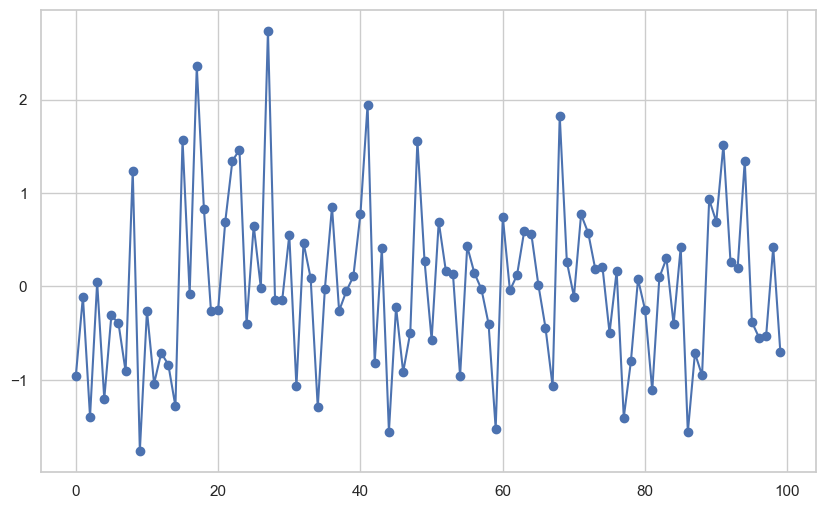

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(Y.numpy(), label='Target', marker='o')

In [7]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(lstm.parameters(), lr=0.01)

for epoch in range(100):
    output = lstm(X)
    loss = loss_fn(output, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.7410229444503784
Epoch 2, Loss: 0.7406873106956482
Epoch 3, Loss: 0.7403558492660522
Epoch 4, Loss: 0.7400283813476562
Epoch 5, Loss: 0.7397046685218811
Epoch 6, Loss: 0.7393845915794373
Epoch 7, Loss: 0.7390680909156799
Epoch 8, Loss: 0.7387548685073853
Epoch 9, Loss: 0.7384449243545532
Epoch 10, Loss: 0.7381381392478943
Epoch 11, Loss: 0.7378341555595398
Epoch 12, Loss: 0.7375330924987793
Epoch 13, Loss: 0.737234890460968
Epoch 14, Loss: 0.7369392514228821
Epoch 15, Loss: 0.736646294593811
Epoch 16, Loss: 0.7363556027412415
Epoch 17, Loss: 0.7360673546791077
Epoch 18, Loss: 0.7357814311981201
Epoch 19, Loss: 0.7354976534843445
Epoch 20, Loss: 0.7352160811424255
Epoch 21, Loss: 0.7349364757537842
Epoch 22, Loss: 0.7346588969230652
Epoch 23, Loss: 0.7343831062316895
Epoch 24, Loss: 0.7341093420982361
Epoch 25, Loss: 0.7338371872901917
Epoch 26, Loss: 0.7335668802261353
Epoch 27, Loss: 0.733298122882843
Epoch 28, Loss: 0.7330310940742493
Epoch 29, Loss: 0.73276555538177